
**<h1 style="color:yellow" align="center">Heart Disease Model with Random Forest</h1>**

Heart disease covers a range of different conditions that could affect your heart. 


It is one of the most complex diseases to predict given the number of potential factors in the body that can lead to it.


**Download**


the dataset from here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


There are 303 records in the dataset and it contains 14 continuous attributes.


**Goal**


The goal is to predict the presence of heart disease in the patient.


The dataset contained an original set of 76 attributes which has been narrowed down to total of 14 as follows: 



• age: The person’s age in years
• sex: The person’s sex (1 = male, 0 = female)
• cp: The chest pain experienced (value 1: typical angina, value 2: atypical angina, value 3: non-anginal
• pain, value 4: asymptomatic)
• trestbps: The person’s resting blood pressure
• chol: The person’s cholesterol measurement in mg/dl
• fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
• restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2= showing probable or definite left ventricular hypertrophy by Estes’ criteria)
• thalach: The person’s maximum heart rate achieved
• exang: Exercise induced angina (1 = yes; 0 = no)
• oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
• slope: The slope of the peak exercise ST segment (value 1: upsloping, value 2: flat, value 3:
• downsloping)
• ca: The number of major vessels (0 – 3)
• thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
• target: Heart disease (0 = no, 1 = yes)


In [109]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

# from keras.utils import to_categorical  ---> Sometime makes ERRORS
import tensorflow as tf
from tensorflow.keras.models import load_model     # loading the model
from tensorflow.keras.models import model_from_json  # loading the model architecture


import numpy as np

# for confusion matrix (old way)
import itertools
from sklearn.metrics import confusion_matrix

# for confusin matrix (new way)


In [110]:
df = pd.read_csv("heart.csv")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**<h2 style="color:cyan">Data Visualization</h2>**

Plot the distribution between heart disease and the absence of it, indicated by the target
attribute


Text(0.5, 0, '')

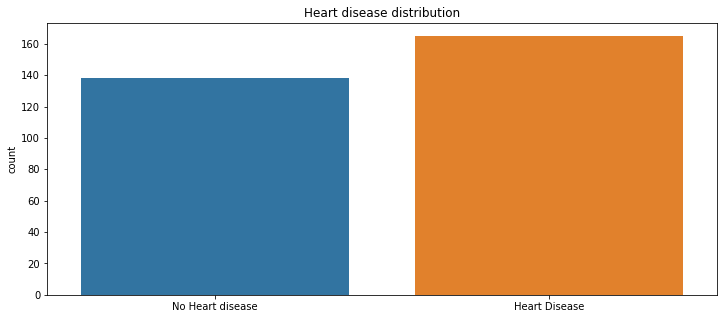

In [111]:
plt.figure(figsize=(12,5))
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Plot the distribution for male and female gender (skew). The distribution of “no heart disease” between males and females is skewed.


Text(0.5, 0, '')

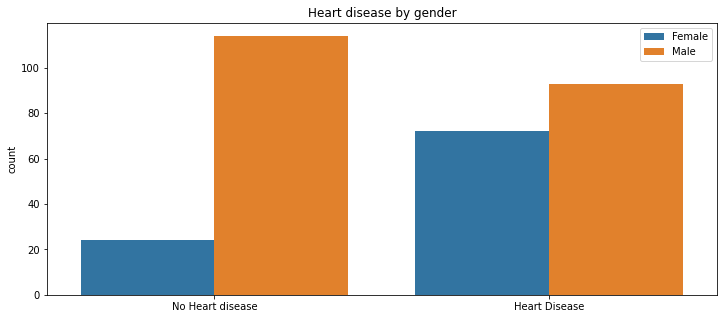

In [112]:
plt.figure(figsize=(12,5))
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Plot a correlation map.
There is no strong correlation between any of the 14 attributes.

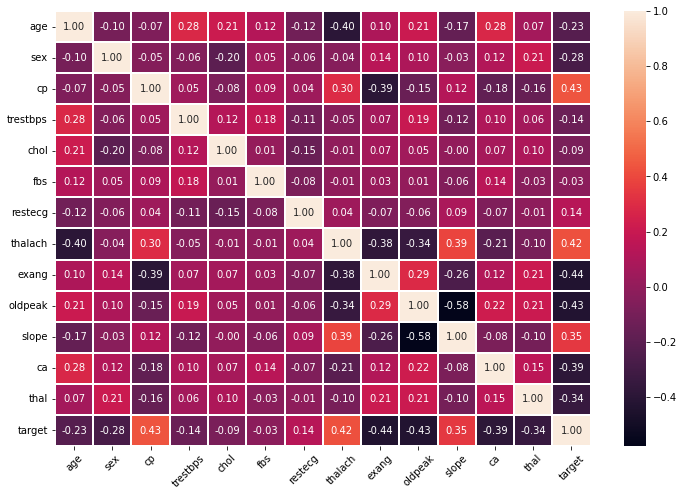

In [113]:
plt.figure(figsize=(12,8))
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True,
fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

In [114]:
# Correlation between target and other features
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**<h2 style="color:cyan">Dropping undeeded columns from the data</h2>**

In [115]:
df = df.drop(["chol", "fbs"],  axis=1)
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


**<h2 style="color:cyan">Encoding</h2>**

In [116]:
dummies_1 = pd.get_dummies(df.cp, prefix='cp')
df = pd.concat([df, dummies_1],axis='columns')
dummies_2 = pd.get_dummies(df.thal, prefix='thal')
df = pd.concat([df, dummies_2],axis='columns')
dummies_3 = pd.get_dummies(df.slope, prefix='slope')
df = pd.concat([df, dummies_3],axis='columns')
dummies_1

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [117]:
df

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,0,150,0,2.3,0,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,1,187,0,3.5,0,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,0,172,0,1.4,2,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,1,178,0,0.8,2,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,1,163,1,0.6,2,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,1,132,0,1.2,1,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,1,141,0,3.4,1,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,1,115,1,1.2,1,1,...,0,0,0,0,0,0,1,0,1,0


In [118]:
df = df.drop(['cp', 'thal', 'slope'], axis='columns')
df

,age,sex,trestbps,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,1,123,1,0.2,0,0,1,0,0,0,0,0,0,1,0,1,0
299,45,1,110,1,132,0,1.2,0,0,0,0,0,1,0,0,0,1,0,1,0
300,68,1,144,1,141,0,3.4,2,0,1,0,0,0,0,0,0,1,0,1,0
301,57,1,130,1,115,1,1.2,1,0,1,0,0,0,0,0,0,1,0,1,0


**<h2 style="color:cyan">Defining X (input) and y (target)</h2>**

In [119]:
X = df.drop(['target'], axis=1)
X.head()

,age,sex,trestbps,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1


In [120]:
X

,age,sex,trestbps,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,1,123,1,0.2,0,1,0,0,0,0,0,0,1,0,1,0
299,45,1,110,1,132,0,1.2,0,0,0,0,1,0,0,0,1,0,1,0
300,68,1,144,1,141,0,3.4,2,1,0,0,0,0,0,0,1,0,1,0
301,57,1,130,1,115,1,1.2,1,1,0,0,0,0,0,0,1,0,1,0


In [121]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [122]:
y.shape

(303,)

In [123]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**<h2 style="color:cyan">Training the model with train_test_split</h2>**

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [125]:
y_test

141    1
91     1
232    0
155    1
281    0
      ..
180    0
44     1
150    1
168    0
217    0
Name: target, Length: 61, dtype: int64

In [126]:
y_test.shape

(61,)

In [127]:
print("Xtrain shape: ", X_train.shape)
print("ytrain shape: ", y_train.shape)
print("Xtest shape: ", X_test.shape)
print("ytest shape: ", y_test.shape)

Xtrain shape:  (242, 19)
ytrain shape:  (242,)
Xtest shape:  (61, 19)
ytest shape:  (61,)


**<h2 style="color:cyan">Model</h2>**


In [128]:
from sklearn.ensemble import RandomForestClassifier #ensemble --> RandomTree contains more trees


In [129]:
from sklearn.metrics import accuracy_score

Estimation_list_min = 1
Estimation_list_max = 1000

scores =[]
n_estimation_list =[]
max_accuracy = 0

for tree in range(Estimation_list_min, Estimation_list_max):
    model = RandomForestClassifier(n_estimators=28, random_state=tree)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predicted))
    n_estimation_list.append(tree)

    current_accuracy = round(accuracy_score(y_predicted, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = tree

In [130]:
print(max_accuracy, best_x)

85.25 63


In [131]:
scores

[0.819672131147541,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.819672131147541,
 0.8032786885245902,
 0.8032786885245902,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.7868852459016393,
 0.8032786885245902,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.8032786885245902,
 0.7540983606557377,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.8032786885245902,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.7868852459016393,
 0.7868852459016393,

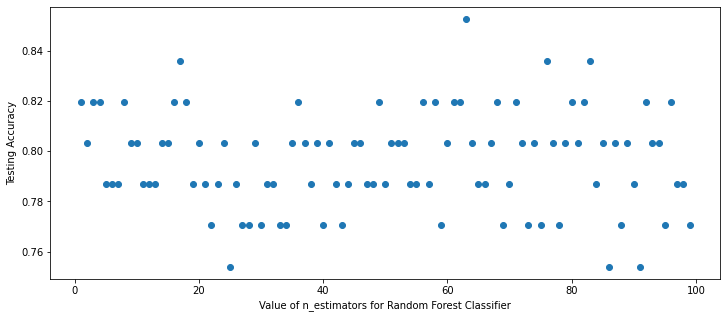

In [132]:
plt.figure(figsize=(12,5))
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.plot(n_estimation_list, scores, 'o')

**<h2 style="color:cyan">Train the model with train datasets</h2>**


In [133]:
# Model Evaluation
model.score(X_test, y_test)

0.7704918032786885

In [134]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted) # Truth value, prediction

Text(69.0, 0.5, 'y_test (Truth)')

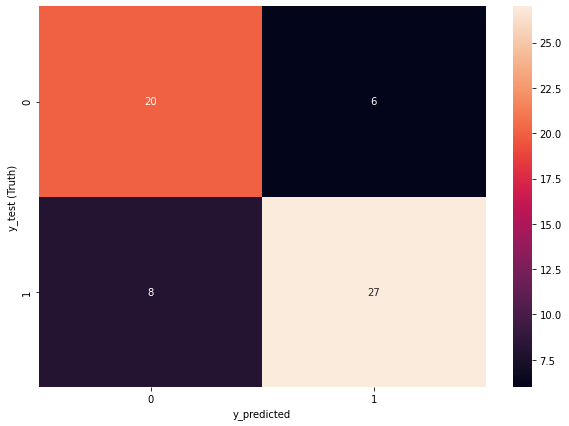

In [135]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test (Truth)')